<a href="https://colab.research.google.com/github/jayachandrareddykamineni/Deep-Learning-For-Google-Stock-Price-Forecasting/blob/master/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten

In [0]:
!pip install -U -q PyDrive

## Loading Data into Google colab from Drive

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
data=pd.read_csv("daily_GOOGL.csv")

In [436]:
data.head()

,timestamp,open,high,low,close,volume
0,2018-11-02,1089.00,1098.00,1067.66,1071.49,2172215
1,2018-11-01,1091.40,1099.90,1077.82,1085.98,2006575
2,2018-10-31,1068.20,1108.00,1068.20,1090.58,3545821
3,2018-10-30,1020.01,1050.90,1013.97,1049.51,2988418
4,2018-10-29,1096.54,1108.83,1007.20,1034.73,4064452


In [437]:
data.tail()

,timestamp,open,high,low,close,volume
3574,2004-08-25,104.76,108.00,103.88,106.000,9188600
3575,2004-08-24,111.24,111.60,103.57,104.870,15247300
3576,2004-08-23,110.76,113.48,109.05,109.400,18256100
3577,2004-08-20,101.01,109.08,100.50,108.310,22834300
3578,2004-08-19,100.01,104.06,95.96,100.335,44659000


In [0]:
data=data[data.iloc[:,0]>='2015-01-01']

In [439]:
data.tail()

,timestamp,open,high,low,close,volume
963,2015-01-08,501.51,507.5000,495.02,506.91,3662224
964,2015-01-07,510.95,511.4900,503.65,505.15,2345875
965,2015-01-06,520.50,521.2100,505.55,506.64,2731813
966,2015-01-05,527.15,527.9899,517.75,519.46,2059119
967,2015-01-02,532.60,535.8000,527.88,529.55,1327870


In [440]:
data.head()

,timestamp,open,high,low,close,volume
0,2018-11-02,1089.00,1098.00,1067.66,1071.49,2172215
1,2018-11-01,1091.40,1099.90,1077.82,1085.98,2006575
2,2018-10-31,1068.20,1108.00,1068.20,1090.58,3545821
3,2018-10-30,1020.01,1050.90,1013.97,1049.51,2988418
4,2018-10-29,1096.54,1108.83,1007.20,1034.73,4064452


In [0]:
train_data=data[data.iloc[:,0]<'2018-08-01']
train_data=train_data.iloc[::-1]

In [442]:
train_data.head()

,timestamp,open,high,low,close,volume
967,2015-01-02,532.60,535.8000,527.88,529.55,1327870
966,2015-01-05,527.15,527.9899,517.75,519.46,2059119
965,2015-01-06,520.50,521.2100,505.55,506.64,2731813
964,2015-01-07,510.95,511.4900,503.65,505.15,2345875
963,2015-01-08,501.51,507.5000,495.02,506.91,3662224


In [443]:
train_data.tail()

,timestamp,open,high,low,close,volume
71,2018-07-25,1252.62,1278.24,1249.05,1275.94,2575437
70,2018-07-26,1267.18,1287.40,1263.00,1285.50,2734302
69,2018-07-27,1289.12,1291.44,1244.49,1252.89,2418090
68,2018-07-30,1245.05,1252.89,1224.17,1230.04,2194837
67,2018-07-31,1231.71,1241.21,1216.19,1227.22,1969111


In [444]:
train_data.shape

(901, 6)

In [0]:
test_data=data[data.iloc[:,0]>='2018-08-01']

In [446]:
test_data=test_data.iloc[::-1]
test_data.tail()

,timestamp,open,high,low,close,volume
4,2018-10-29,1096.54,1108.83,1007.20,1034.73,4064452
3,2018-10-30,1020.01,1050.90,1013.97,1049.51,2988418
2,2018-10-31,1068.20,1108.00,1068.20,1090.58,3545821
1,2018-11-01,1091.40,1099.90,1077.82,1085.98,2006575
0,2018-11-02,1089.00,1098.00,1067.66,1071.49,2172215


In [0]:
training_set = train_data.iloc[:, 1:2].values
#training_set

In [448]:
#import numpy as np
#training_set=np.flipud(training_set) 
training_set

array([[ 532.6   ],
       [ 527.15  ],
       [ 520.5   ],
       [ 510.95  ],
       [ 501.51  ],
       [ 508.18  ],
       [ 499.24  ],
       [ 502.57  ],
       [ 500.42  ],
       [ 508.89  ],
       [ 503.15  ],
       [ 512.77  ],
       [ 510.84  ],
       [ 523.    ],
       [ 538.03  ],
       [ 541.5   ],
       [ 531.4   ],
       [ 525.    ],
       [ 512.9   ],
       [ 519.    ],
       [ 534.32  ],
       [ 529.94  ],
       [ 533.14  ],
       [ 527.93  ],
       [ 531.01  ],
       [ 531.06  ],
       [ 532.15  ],
       [ 539.73  ],
       [ 539.66  ],
       [ 547.51  ],
       [ 551.16  ],
       [ 543.82  ],
       [ 542.47  ],
       [ 547.58  ],
       [ 539.    ],
       [ 531.55  ],
       [ 538.44  ],
       [ 545.74  ],
       [ 558.15  ],
       [ 567.    ],
       [ 576.35  ],
       [ 576.97  ],
       [ 579.62  ],
       [ 582.    ],
       [ 570.92  ],
       [ 568.475 ],
       [ 559.8   ],
       [ 558.48  ],
       [ 559.23  ],
       [ 556.93  ],


In [0]:
real_stock_price = test_data.iloc[:, 1:2].values

In [450]:
real_stock_price
#real_stock_price=np.flipud(real_stock_price)

array([[1239.11],
       [1218.5 ],
       [1245.18],
       [1241.61],
       [1252.01],
       [1256.72],
       [1262.73],
       [1259.18],
       [1251.2 ],
       [1252.5 ],
       [1244.28],
       [1241.99],
       [1222.04],
       [1220.66],
       [1223.02],
       [1214.22],
       [1219.88],
       [1226.  ],
       [1244.14],
       [1255.9 ],
       [1255.  ],
       [1263.4 ],
       [1252.21],
       [1222.52],
       [1209.22],
       [1198.57],
       [1172.  ],
       [1184.2 ],
       [1171.1 ],
       [1182.  ],
       [1179.7 ],
       [1188.  ],
       [1177.77],
       [1162.66],
       [1168.96],
       [1180.67],
       [1194.92],
       [1159.41],
       [1184.25],
       [1193.69],
       [1200.  ],
       [1204.09],
       [1213.  ],
       [1206.67],
       [1212.  ],
       [1205.03],
       [1176.  ],
       [1160.  ],
       [1151.31],
       [1136.4 ],
       [1079.04],
       [1119.64],
       [1118.  ],
       [1113.48],
       [1140.  ],
       [11

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [452]:
training_set_scaled.shape

(901, 1)

In [0]:
import numpy as np
X_train = []
y_train = []
for i in range(63, 901):
    X_train.append(training_set_scaled[i-63:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [454]:
print(X_train)

[[0.04223426 0.03533448 0.02691548 ... 0.07431509 0.07037778 0.06098395]
 [0.03533448 0.02691548 0.01482504 ... 0.07037778 0.06098395 0.0501342 ]
 [0.02691548 0.01482504 0.00287385 ... 0.06098395 0.0501342  0.05792019]
 ...
 [0.69162404 0.67754596 0.65460576 ... 0.97705981 0.95379045 0.97222363]
 [0.67754596 0.65460576 0.67701423 ... 0.95379045 0.97222363 1.        ]
 [0.65460576 0.67701423 0.66608852 ... 0.97222363 1.         0.94420671]]


In [455]:
print(y_train)

[0.0501342  0.05792019 0.05919887 0.06326277 0.06371854 0.06052818
 0.05992049 0.0490201  0.04951385 0.04819719 0.04369018 0.05959133
 0.05547678 0.06478199 0.10230668 0.09309009 0.08239226 0.07756874
 0.07510002 0.06490859 0.06551628 0.06446549 0.05494505 0.04641211
 0.06283233 0.06235124 0.05516028 0.0521978  0.05662886 0.06475667
 0.05643895 0.0617309  0.06542766 0.06451613 0.06990935 0.06752924
 0.06259179 0.06906112 0.06831417 0.06265509 0.06100927 0.0707196
 0.06702284 0.06679496 0.06376918 0.05593255 0.05881906 0.06994733
 0.06065478 0.055059   0.05727452 0.05846458 0.0617309  0.07251734
 0.07617613 0.07665721 0.08006279 0.07730288 0.07655593 0.06014838
 0.05804679 0.05623639 0.05760369 0.05445131 0.06100927 0.05869246
 0.06255381 0.06895984 0.07630273 0.0952803  0.10697828 0.11427052
 0.22884489 0.2402137  0.23502304 0.24659442 0.24384717 0.22475566
 0.19285208 0.20575277 0.20638578 0.20028359 0.20947486 0.20056211
 0.20901909 0.21080417 0.22123614 0.21337418 0.21250063 0.25363

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [457]:

X_train.shape

(838, 63, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D, RepeatVector
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers.wrappers import Bidirectional
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *

In [459]:
X_train.shape[1]

63

In [0]:
regressor = Sequential()

In [0]:
regressor.add(Bidirectional(GRU(units = 50, return_sequences=True,input_shape = (X_train.shape[1], 1))))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Bidirectional(GRU(units = 50)))
regressor.add(Dropout(0.2))

In [0]:
#regressor.add(Dense(units = 1))
regressor.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
regressor.add(Dense(1,kernel_initializer="uniform",activation='linear'))

In [0]:

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [465]:
regressor.fit(X_train, y_train, epochs = 40, batch_size = 256)

Epoch 1/40
838/838 [==============================] - 8s 9ms/step - loss: 0.2435
Epoch 2/40
838/838 [==============================] - 2s 3ms/step - loss: 0.2261
Epoch 3/40
838/838 [==============================] - 2s 2ms/step - loss: 0.1972
Epoch 4/40
838/838 [==============================] - 2s 3ms/step - loss: 0.1424
Epoch 5/40
838/838 [==============================] - 2s 2ms/step - loss: 0.0569
Epoch 6/40
838/838 [==============================] - 2s 3ms/step - loss: 0.0237
Epoch 7/40
838/838 [==============================] - 2s 2ms/step - loss: 0.0295
Epoch 8/40
838/838 [==============================] - 2s 2ms/step - loss: 0.0109
Epoch 9/40
838/838 [==============================] - 2s 2ms/step - loss: 0.0186
Epoch 10/40
838/838 [==============================] - 2s 2ms/step - loss: 0.0136
Epoch 11/40
838/838 [==============================] - 2s 2ms/step - loss: 0.0082
Epoch 12/40
838/838 [==============================] - 2s 2ms/step - loss: 0.0101
Epoch 13/40
838/838 [====

In [0]:
import pandas as pd
dataset_total = pd.concat((train_data['open'], test_data['open']), axis = 0)

In [0]:
inputs = dataset_total[len(dataset_total) - len(test_data) - 63:].values
inputs = inputs.reshape(-1,1)

In [468]:
inputs

array([[1034.  ],
       [1025.37],
       [1019.61],
       [1053.89],
       [1064.62],
       [1064.1 ],
       [1095.  ],
       [1100.41],
       [1105.57],
       [1096.9 ],
       [1085.09],
       [1081.46],
       [1066.  ],
       [1079.  ],
       [1089.8 ],
       [1070.  ],
       [1086.9 ],
       [1086.55],
       [1076.  ],
       [1073.48],
       [1082.  ],
       [1112.87],
       [1138.5 ],
       [1154.66],
       [1152.77],
       [1144.58],
       [1131.21],
       [1132.94],
       [1141.02],
       [1152.28],
       [1152.21],
       [1159.92],
       [1152.69],
       [1170.11],
       [1183.3 ],
       [1185.51],
       [1171.49],
       [1155.  ],
       [1144.14],
       [1136.  ],
       [1112.39],
       [1132.31],
       [1115.35],
       [1149.42],
       [1124.6 ],
       [1141.77],
       [1160.  ],
       [1169.99],
       [1155.62],
       [1174.86],
       [1202.8 ],
       [1203.81],
       [1182.74],
       [1208.53],
       [1206.65],
       [11

In [469]:
len(inputs)

130

In [0]:
inputs = sc.transform(inputs)
X_test = []
for i in range(63, 130):
    X_test.append(inputs[i-63:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [471]:
XTest=np.reshape(X_test[0],(1,63,1))
X_test.shape

(67, 63, 1)

In [0]:

predicted=[]
for i in range(67):

  p=sc.inverse_transform(regressor.predict(XTest))
  predicted.append(sc.inverse_transform(regressor.predict(XTest)))
  XTest=np.reshape(XTest,(63))
  XTest=np.delete(XTest,0)
  XTest=np.append(XTest,sc.transform(p))
  XTest=np.reshape(XTest,(1,63,1))

In [0]:
predicted_stock_price_60days=np.reshape(predicted,(67,1))

In [474]:
predicted_stock_price

array([[1172.5845],
       [1174.1698],
       [1174.8293],
       [1178.5603],
       [1180.462 ],
       [1182.8618],
       [1185.6039],
       [1186.9325],
       [1187.2734],
       [1186.3171],
       [1185.759 ],
       [1185.1155],
       [1184.6317],
       [1183.507 ],
       [1181.9678],
       [1180.6527],
       [1180.2617],
       [1180.1888],
       [1181.4554],
       [1185.5923],
       [1191.3344],
       [1196.6068],
       [1200.7703],
       [1202.2671],
       [1200.085 ],
       [1196.8746],
       [1193.5542],
       [1189.2103],
       [1186.7133],
       [1183.474 ],
       [1181.4779],
       [1179.944 ],
       [1179.263 ],
       [1178.2048],
       [1174.8662],
       [1171.4312],
       [1169.0122],
       [1168.6632],
       [1165.8641],
       [1166.111 ],
       [1167.9628],
       [1171.8202],
       [1175.1586],
       [1180.195 ],
       [1182.9333],
       [1187.4385],
       [1190.4515],
       [1190.0071],
       [1187.9684],
       [1186.4551],


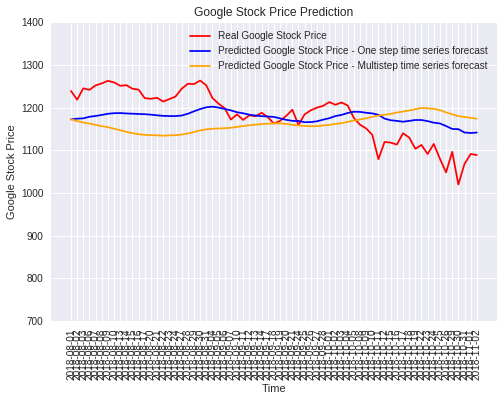

In [475]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price - One step time series forecast')
plt.plot(predicted_stock_price_60days, color = 'orange', label = 'Predicted Google Stock Price - Multistep time series forecast')
plt.ylim(700,1400)
plt.xticks(np.arange(67),test_data['timestamp'], rotation='vertical')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [476]:
real_stock_price.shape

(67, 1)

In [477]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(real_stock_price,predicted_stock_price[0:67]))

52.186539664622416

In [0]:
def cal_target(df):
    list_y =[]
    temp = df
    for i in range(len(temp)-1):
        if temp[i+1] > temp[i]:
            y = 1
        else:
            y = -1
            
        list_y.append(y)
    ydf = pd.DataFrame(list_y)
    return ydf

In [0]:
real_stock_price_trend = cal_target(real_stock_price)
predicted_stock_price_trend =cal_target(predicted_stock_price[0:67])

In [480]:
real_df = pd.DataFrame(real_stock_price_trend)
pred_df = pd.DataFrame(predicted_stock_price_trend)
acc_df = pd.concat((real_df[0],pred_df[0]), axis=1)
acc_df.head(100)

,0,0
0,-1,1
1,1,1
2,-1,1
3,1,1
4,1,1
5,1,1
6,-1,1
7,-1,1
8,1,-1
9,-1,-1


In [481]:
from sklearn.metrics import accuracy_score
score = accuracy_score(real_stock_price_trend, predicted_stock_price_trend)
print(score)

0.5303030303030303


In [482]:
from sklearn.metrics import classification_report
print(classification_report(real_stock_price_trend, predicted_stock_price_trend))

              precision    recall  f1-score   support

          -1       0.56      0.64      0.60        36
           1       0.48      0.40      0.44        30

   micro avg       0.53      0.53      0.53        66
   macro avg       0.52      0.52      0.52        66
weighted avg       0.52      0.53      0.52        66



In [483]:
from sklearn.metrics import f1_score
f1_score(real_stock_price_trend, predicted_stock_price_trend)

0.4363636363636364

## Hyper Parameter Tuning

### Testing GRU model with different values of Epochs

In [484]:
for i in range(1,10):
  print (f'For Epoch {10*i} \n')
  regressor = Sequential()
  regressor.add(Bidirectional(GRU(units = 50, return_sequences=True,input_shape = (X_train.shape[1], 1))))
  regressor.add(Dropout(0.2))
  regressor.add(Bidirectional(GRU(units = 50)))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
  regressor.add(Dense(1,kernel_initializer="uniform",activation='linear'))
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  regressor.fit(X_train, y_train, epochs = 10*i, batch_size = 256,verbose=0)
  predicted_stock_price = regressor.predict(X_test)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)
  print(f' RMSE value for {i*10} ephocs is {np.sqrt(metrics.mean_squared_error(real_stock_price,predicted_stock_price[0:67]))} \n')

For Epoch 10 

 RMSE value for 10 ephocs is 150.09300678642964 

For Epoch 20 

 RMSE value for 20 ephocs is 63.5953470751227 

For Epoch 30 

 RMSE value for 30 ephocs is 55.84824339833011 

For Epoch 40 

 RMSE value for 40 ephocs is 47.27922476379977 

For Epoch 50 

 RMSE value for 50 ephocs is 54.20826713677029 

For Epoch 60 

 RMSE value for 60 ephocs is 45.33394829903102 

For Epoch 70 

 RMSE value for 70 ephocs is 45.385352329271626 

For Epoch 80 

 RMSE value for 80 ephocs is 40.7164307458239 

For Epoch 90 

 RMSE value for 90 ephocs is 38.192650446134884 



#### GRU model works best for 40,60 and 90 ephocs.

### Testing GRU model with different batch sizes

In [485]:
batch = [100,200,256,300,400]
for i in batch:
  print (f'For Batch size of  {i} \n')
  regressor = Sequential()
  regressor.add(Bidirectional(GRU(units = 50, return_sequences=True,input_shape = (X_train.shape[1], 1))))
  regressor.add(Dropout(0.2))
  regressor.add(Bidirectional(GRU(units = 50)))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
  regressor.add(Dense(1,kernel_initializer="uniform",activation='linear'))
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  regressor.fit(X_train, y_train, epochs = 40, batch_size = i,verbose=0)
  predicted_stock_price = regressor.predict(X_test)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)
  print(f' RMSE value for batch size of  {i} is {np.sqrt(metrics.mean_squared_error(real_stock_price,predicted_stock_price[0:67]))} \n')
  

For Batch size of  100 

 RMSE value for batch size of  100 is 39.401878093550316 

For Batch size of  200 

 RMSE value for batch size of  200 is 51.89513749536886 

For Batch size of  256 

 RMSE value for batch size of  256 is 48.744588984228976 

For Batch size of  300 

 RMSE value for batch size of  300 is 56.18752892716992 

For Batch size of  400 

 RMSE value for batch size of  400 is 56.13712146794519 



#### By changing the Batch size, the variation in RMSE values has differed by 1 or 2 percent which implies that batch size didn't effect the model performance.

### Testing GRU model with different types of Activation functions

In [486]:
activations = ['relu','linear','tanh','softmax','elu','selu']

for acti in activations:
  print(f'Activation function = {acti} \n')
  regressor = Sequential()
  regressor.add(Bidirectional(GRU(units = 50, return_sequences=True,input_shape = (X_train.shape[1], 1))))
  regressor.add(Dropout(0.2))
  regressor.add(Bidirectional(GRU(units = 50)))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(32,kernel_initializer="uniform",activation=acti))        
  regressor.add(Dense(1,kernel_initializer="uniform",activation=acti))
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  
  regressor.fit(X_train, y_train, epochs = 40, batch_size = 256,verbose=0)
  predicted_stock_price = regressor.predict(X_test)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)
  print(f' RMSE value for {acti} activation function is {np.sqrt(metrics.mean_squared_error(real_stock_price,predicted_stock_price[0:67]))} \n')

Activation function = relu 

 RMSE value for relu activation function is 53.3225857839009 

Activation function = linear 

 RMSE value for linear activation function is 49.18798832871262 

Activation function = tanh 

 RMSE value for tanh activation function is 77.02977283564688 

Activation function = softmax 

 RMSE value for softmax activation function is 123.13551817320817 

Activation function = elu 

 RMSE value for elu activation function is 50.77125789667023 

Activation function = selu 

 RMSE value for selu activation function is 48.63332678449082 



####  'Relu , linear and selu actvation functions worked well for the GRU Model'

### Testing GRU model with different no of Hidden layers

In [487]:
for i in range(1,6):
  print (f'For  {10*i} Hidden Layers \n')
  regressor = Sequential()
  regressor.add(Bidirectional(GRU(units = 10*i, return_sequences=True,input_shape = (X_train.shape[1], 1))))
  regressor.add(Dropout(0.2))
  regressor.add(Bidirectional(GRU(units = 10*i)))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
  regressor.add(Dense(1,kernel_initializer="uniform",activation='linear'))
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  regressor.fit(X_train, y_train, epochs = 40, batch_size = 256,verbose=0)
  predicted_stock_price = regressor.predict(X_test)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)
  print(f' RMSE value for {i*10} hidden layers is {np.sqrt(metrics.mean_squared_error(real_stock_price,predicted_stock_price[0:67]))} \n')
  

For  10 Hidden Layers 

 RMSE value for 10 hidden layers is 61.19493536050157 

For  20 Hidden Layers 

 RMSE value for 20 hidden layers is 59.044352364641774 

For  30 Hidden Layers 

 RMSE value for 30 hidden layers is 55.42958923704858 

For  40 Hidden Layers 

 RMSE value for 40 hidden layers is 56.5487893083124 

For  50 Hidden Layers 

 RMSE value for 50 hidden layers is 47.22517771447541 



#### For 10,40 and 50 hidden units the GRU model works better

#### Training GRU Model with Fine tuned Parameters

In [488]:
regressor = Sequential()
regressor.add(Bidirectional(GRU(units = 50, return_sequences=True,input_shape = (X_train.shape[1], 1))))
regressor.add(Dropout(0.2))
regressor.add(Bidirectional(GRU(units = 50)))
regressor.add(Dropout(0.2))
regressor.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
regressor.add(Dense(1,kernel_initializer="uniform",activation='linear'))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 90, batch_size = 256,verbose=0)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(f' RMSE value for fine tuned model is is {np.sqrt(metrics.mean_squared_error(real_stock_price,predicted_stock_price[0:67]))} \n')
  

 RMSE value for fine tuned model is is 31.622417996553164 



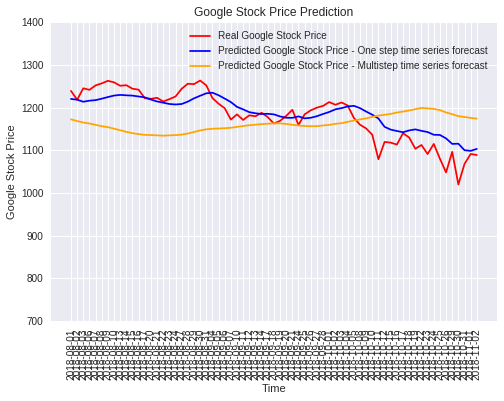

In [501]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price - One step time series forecast')
plt.plot(predicted_stock_price_60days, color = 'orange', label = 'Predicted Google Stock Price - Multistep time series forecast')
plt.ylim(700,1400)
plt.xticks(np.arange(67),test_data['timestamp'], rotation='vertical')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

**Visualisations**

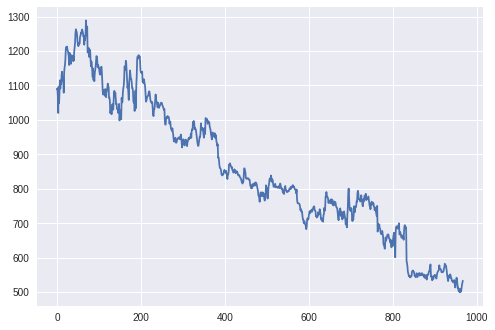

In [489]:
import matplotlib.pyplot as plt
plt.plot(data['open'])

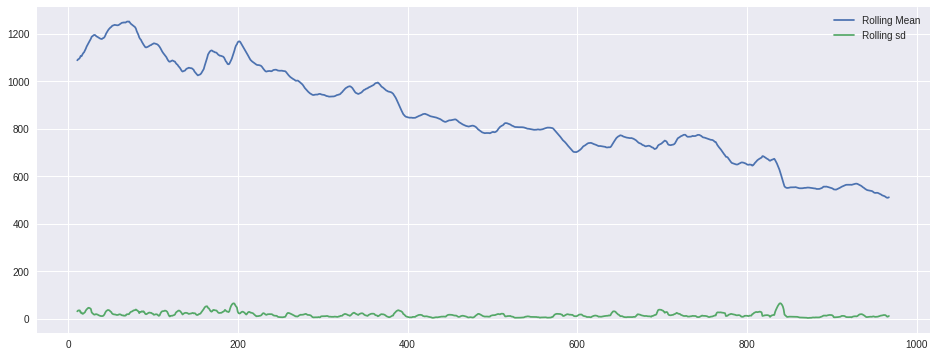

In [490]:
plt.figure(figsize=(16,6))
plt.plot(data['open'].rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(data['open'].rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

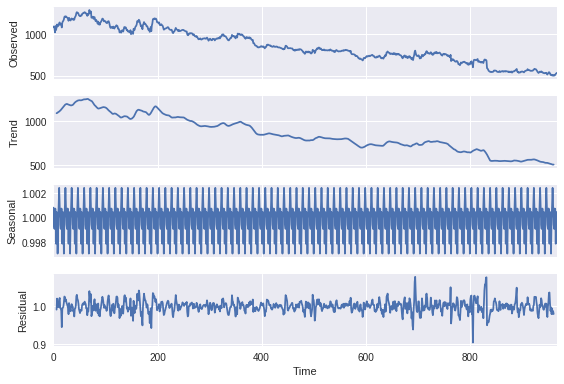

In [491]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(data['open'].values,freq=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()

In [0]:
data=pd.read_csv("daily_GOOGL.csv")
data=data[data.iloc[:,0]>='2015-01-01']
train_data=data[data.iloc[:,0]<'2018-08-01']
train_data=train_data.iloc[::-1]
test_data=data[data.iloc[:,0]>='2018-08-01']
test_data=test_data.iloc[::-1]
test_data.tail()
training_set = train_data.iloc[:, 1:2].values
import numpy as np

In [493]:
train_data

,timestamp,open,high,low,close,volume
967,2015-01-02,532.60,535.8000,527.8800,529.550,1327870
966,2015-01-05,527.15,527.9899,517.7500,519.460,2059119
965,2015-01-06,520.50,521.2100,505.5500,506.640,2731813
964,2015-01-07,510.95,511.4900,503.6500,505.150,2345875
963,2015-01-08,501.51,507.5000,495.0200,506.910,3662224
962,2015-01-09,508.18,508.6000,498.6500,500.720,2065403
961,2015-01-12,499.24,500.2800,490.9100,497.060,2856938
960,2015-01-13,502.57,508.6000,497.2600,501.800,3050295
959,2015-01-14,500.42,508.2600,498.1600,505.930,2639959
958,2015-01-15,508.89,509.7500,502.0100,504.010,2556682


In [494]:
training_set

array([[ 532.6   ],
       [ 527.15  ],
       [ 520.5   ],
       [ 510.95  ],
       [ 501.51  ],
       [ 508.18  ],
       [ 499.24  ],
       [ 502.57  ],
       [ 500.42  ],
       [ 508.89  ],
       [ 503.15  ],
       [ 512.77  ],
       [ 510.84  ],
       [ 523.    ],
       [ 538.03  ],
       [ 541.5   ],
       [ 531.4   ],
       [ 525.    ],
       [ 512.9   ],
       [ 519.    ],
       [ 534.32  ],
       [ 529.94  ],
       [ 533.14  ],
       [ 527.93  ],
       [ 531.01  ],
       [ 531.06  ],
       [ 532.15  ],
       [ 539.73  ],
       [ 539.66  ],
       [ 547.51  ],
       [ 551.16  ],
       [ 543.82  ],
       [ 542.47  ],
       [ 547.58  ],
       [ 539.    ],
       [ 531.55  ],
       [ 538.44  ],
       [ 545.74  ],
       [ 558.15  ],
       [ 567.    ],
       [ 576.35  ],
       [ 576.97  ],
       [ 579.62  ],
       [ 582.    ],
       [ 570.92  ],
       [ 568.475 ],
       [ 559.8   ],
       [ 558.48  ],
       [ 559.23  ],
       [ 556.93  ],


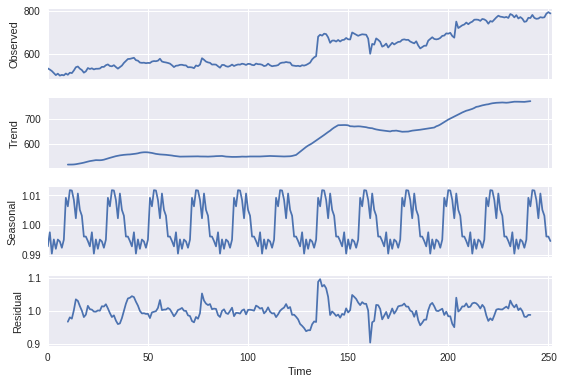

In [495]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(training_set[0:252],freq=21,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()

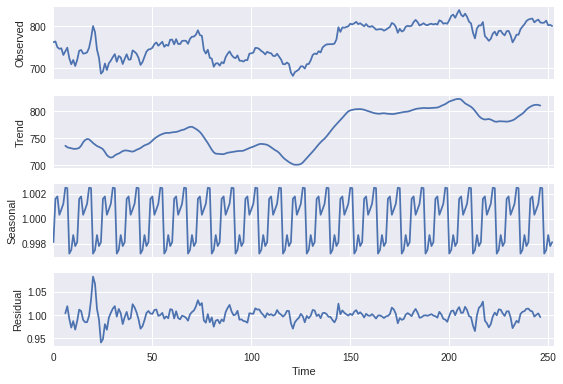

In [496]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(training_set[252:505],freq=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()

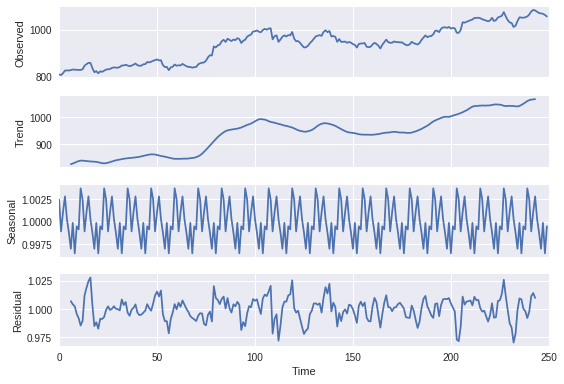

In [497]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(training_set[505:755],freq=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()

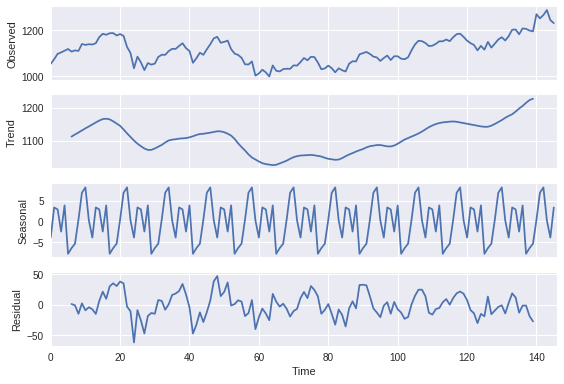

In [498]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(training_set[755:],freq=12)
#plt.figure(figsize=(16,12))
fig = res.plot()

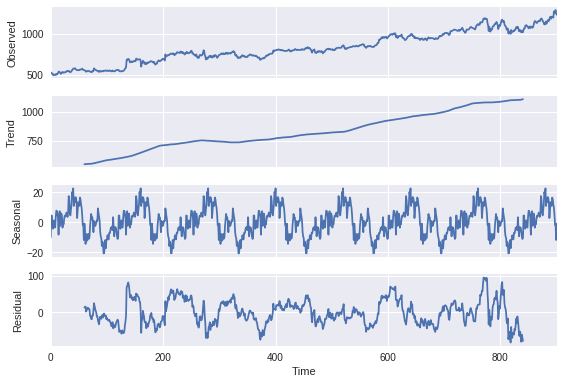

In [499]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(training_set,freq=120)
#plt.figure(figsize=(16,12))
fig = res.plot()

In [500]:
train_data.iloc[0:252,:]

,timestamp,open,high,low,close,volume
967,2015-01-02,532.60,535.8000,527.8800,529.550,1327870
966,2015-01-05,527.15,527.9899,517.7500,519.460,2059119
965,2015-01-06,520.50,521.2100,505.5500,506.640,2731813
964,2015-01-07,510.95,511.4900,503.6500,505.150,2345875
963,2015-01-08,501.51,507.5000,495.0200,506.910,3662224
962,2015-01-09,508.18,508.6000,498.6500,500.720,2065403
961,2015-01-12,499.24,500.2800,490.9100,497.060,2856938
960,2015-01-13,502.57,508.6000,497.2600,501.800,3050295
959,2015-01-14,500.42,508.2600,498.1600,505.930,2639959
958,2015-01-15,508.89,509.7500,502.0100,504.010,2556682
